In [3]:
import pandas as pd
import numpy as np
googleplaystore = pd.read_csv("./data/processed_googleplaystore.csv")

In [4]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0.0,1,3,2018-01-07,1,4.03
1,Coloring book moana,0,3.9,967,14.0,500000,0,0.0,1,3,2018-01-15,2,4.03
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0.0,1,3,2018-08-01,1,4.03
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0.0,4,3,2018-06-08,0,4.20
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0.0,1,3,2018-06-20,1,4.40


In [5]:
cols = googleplaystore.columns
cols

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Input features
## Modify some of number the input features

In [6]:
feature_cols = ['Category', 'Reviews','Size','Installs', 'Type',
       'Price', 'Content Rating', 'Android Ver']
X = googleplaystore[feature_cols]# Features
y = googleplaystore.Rating # Target variable
y = y.astype(int)

X = googleplaystore.drop(['Rating'],axis =1)# Features
y = googleplaystore.Rating # Target variable

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Models

In [8]:
from sklearn.linear_model import LogisticRegression,LinearRegression

# instantiate the model (using the default parameters)
lreg = LogisticRegression()

# fit the model with data
lreg.fit(X_train,y_train)

#
y_pred_log=lreg.predict(X_test)

In [9]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_smv = clf.predict(X_test)

In [10]:
from sklearn import tree
clf_decision = tree.DecisionTreeClassifier()

clf_decision.fit(X_train, y_train)

y_pred_dec = clf_decision.predict(X_test)

## Accuracy

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log))
print(accuracy_score(y_test,y_pred_smv))
print(accuracy_score(y_test,y_pred_dec))

0.7628205128205128
0.7623931623931623
0.708974358974359


## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

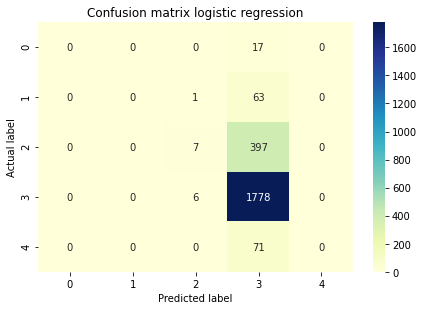

In [13]:
cnf_matrixlogreg = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cnf_matrixlogreg, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

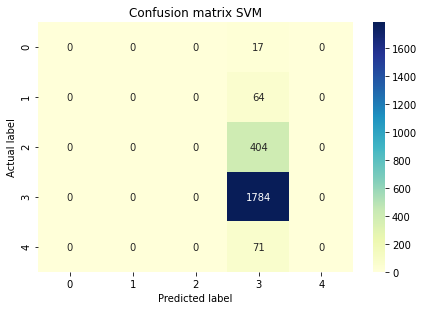

In [15]:
cnf_matrixsvm = confusion_matrix(y_test, y_pred_smv)

sns.heatmap(cnf_matrixsvm, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

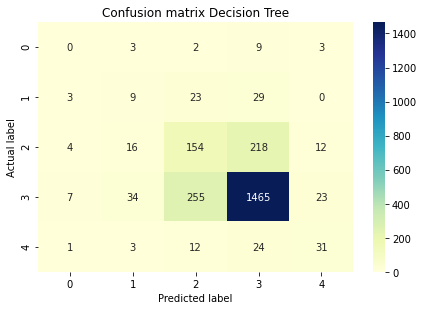

In [16]:
cnf_matrixdec = confusion_matrix(y_test, y_pred_dec)

sns.heatmap(cnf_matrixdec, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')